# Data Preparation and EDA for Student References

The aim for this project is to find out which factors of a university which become preferences for students to choose such university as their favourite universities.

**Data Source**

Data from various American Universities for 2013 will be used for this project. Data can be obtained from <a href="https://www.kaggle.com/sumithbhongale/american-university-data-ipeds-dataset" target="_blank">Kaggle</a>

## Environment Preparation

First of all, we need to set up jupyter notebook environment:
1. Installing necessary library
2. Import library we will use for analysis

In [1]:
import sys

In [2]:
pip install dataprep

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dataprep.eda import plot, plot_correlation, plot_missing

NumExpr defaulting to 4 threads.


## Data Preparation

After all necessary libraries imported, we need to prepare the dataset before cleaning the data later.

In [4]:
# Creating dataframe from the dataset and check the head of dataframe
df = pd.read_excel('D:/Data Analytics Course/Data/american_uni/IPEDS_data.xlsx', sheet_name = 'Data')
df.head(10)

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   
5     100751            The University of Alabama  2013  35487-0166   
6     100812              Athens State University  2013       35611   
7     100830      Auburn University at Montgomery  2013  36117-3596   
8     100858                    Auburn University  2013       36849   
9     100937          Birmingham Southern College  2013       35254   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   
5  Doctor's degree - research/scholarship and pro...  Tuscaloosa County   
6                                  Bachelor's degree   Limestone County   
7             Doctor's degree - research/scholarship  Montgomery County   
8  Doctor's degree - research/scholarship and pro...         Lee County   
9                                  Bachelor's degree   Jefferson County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
2                         -86.174010                         32.362609   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   
6                         -86.965140                         34.805625   
7                         -86.177351                         32.369939   
8                         -85.492409                         32.600201   
9                         -86.853636                         33.515453   

  Religious affiliation Offers Less than one year certificate  ...  \
0        Not applicable                            Implied no  ...   
1        Not applicable                            Implied no  ...   
2    Churches of Christ                            Implied no  ...   
3        Not applicable                                   Yes  ...   
4        Not applicable                            Implied no  ...   
5        Not applicable                            Implied no  ...   
6        Not applicable                            Implied no  ...   
7        Not applicable                            Implied no  ...   
8        Not applicable                            Implied no  ...   
9      United Methodist                            Implied no  ...   

  Percent of freshmen  receiving federal grant aid  \
0                                             81.0   
1                                             36.0   
2                                             90.0   
3                                             31.0   
4                                             76.0   
5                                             20.0   
6                                              NaN   
7                                             48.0   
8                                             13.0   
9                                             21.0   

  Percent of freshmen receiving Pell grants  \
0                                      81.0   
1                                      36.0   
2                                      90.0   
3                         

In [5]:
# Check summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(116), int64(2), object(27)
memory usage: 1.7+ MB


In [6]:
df.describe()

ID number    year  Longitude location of institution  \
count    1534.000000  1534.0                        1534.000000   
mean   189091.037810  2013.0                         -88.342338   
std     58641.915456     0.0                          14.838804   
min    100654.000000  2013.0                        -158.062444   
25%    153148.500000  2013.0                         -94.576341   
50%    186508.000000  2013.0                         -84.514218   
75%    215730.000000  2013.0                         -77.207136   
max    456490.000000  2013.0                         -67.456534   

       Latitude location of institution  Applicants total  Admissions total  \
count                       1534.000000       1377.000000       1377.000000   
mean                          38.729993       6391.193174       3554.880174   
std                            4.832832       8787.469171       4309.457606   
min                           19.701854          0.000000          0.000000   
25%                           35.348340       1488.000000        950.000000   
50%                           39.946096       3350.000000       2056.000000   
75%                           41.984929       7016.000000       4203.000000   
max                           64.857053      72676.000000      35815.000000   

       Enrolled total  Percent of freshmen submitting SAT scores  \
count     1377.000000                                1257.000000   
mean      1043.046478                                  53.927605   
std       1285.165519                                  34.385164   
min          0.000000                                   0.000000   
25%        287.000000                                  16.000000   
50%        538.000000                                  65.000000   
75%       1246.000000                                  86.000000   
max      10241.000000                                 100.000000   

       Percent of freshmen submitting ACT scores  \
count                                1259.000000   
mean                                   53.085782   
std                                    31.658662   
min                                     0.000000   
25%                                    26.000000   
50%                                    49.000000   
75%                                    87.000000   
max                                   100.000000   

       SAT Critical Reading 25th percentile score  ...  \
count                                 1169.000000  ...   
mean                                   470.340462  ...   
std                                     68.368390  ...   
min                                    310.000000  ...   
25%                                    430.000000  ...   
50%                                    460.000000  ...   
75%                                    500.000000  ...   
max                                    720.000000  ...   

       Percent of freshmen  receiving federal grant aid  \
count                                        1492.00000   
mean                                           41.47185   
std                                            18.88068   
min                                             0.00000   
25%                                            28.00000   
50%                                            40.00000   
75%                                            51.25000   
max                                           100.00000   

       Percent of freshmen receiving Pell grants  \
count                                1492.000000   
mean                                   40.764075   
std                                    18.560557   
min                                     0.000000   
25%                                    27.000000   
50%                                    39.000000   
75%                                    51.000000   
max                                   100.000000   

       Percent of freshmen receiving other federal grant aid  \
count                    

In [7]:
# Check missing data for each column
percentage_miss = (df.isnull().sum()/ len(df)) * 100
percentage_miss

ID number                                                 0.000000
Name                                                      0.000000
year                                                      0.000000
ZIP code                                                  0.000000
Highest degree offered                                    0.000000
                                                           ...    
Percent of freshmen receiving student loan aid            2.737940
Percent of freshmen receiving federal student loans       2.737940
Percent of freshmen receiving other loan aid              2.737940
Endowment assets (year end) per FTE enrollment (GASB)    66.362451
Endowment assets (year end) per FTE enrollment (FASB)    37.418514
Length: 145, dtype: float64

In [8]:
# Filter out column with > 20% missing value
high_percentage_miss = percentage_miss[percentage_miss >= 20].sort_values(ascending = False)
high_percentage_miss

Endowment assets (year end) per FTE enrollment (GASB)       66.362451
SAT Writing 25th percentile score                           53.455020
SAT Writing 75th percentile score                           53.455020
Percent of first-time undergraduates - in-state             40.612777
Percent of first-time undergraduates - out-of-state         40.612777
Percent of first-time undergraduates - residence unknown    40.612777
Number of first-time undergraduates - residence unknown     40.612777
Percent of first-time undergraduates - foreign countries    40.612777
Number of first-time undergraduates - in-state              40.612777
Number of first-time undergraduates - foreign countries     40.612777
Number of first-time undergraduates - out-of-state          40.612777
Endowment assets (year end) per FTE enrollment (FASB)       37.418514
SAT Critical Reading 75th percentile score                  23.794003
SAT Critical Reading 25th percentile score                  23.794003
SAT Math 75th percen

Text(0, 0.5, '% of Missing Values')

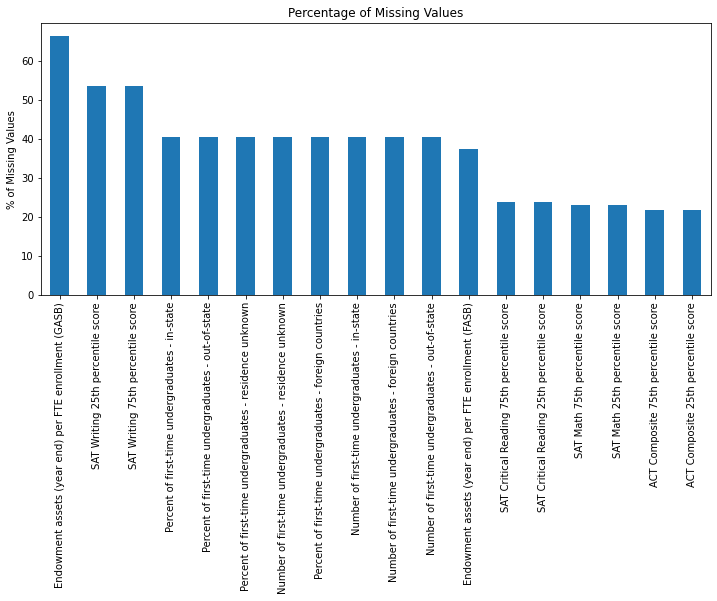

In [9]:
# Plot column with 20% missing value
ax = high_percentage_miss.plot.bar(title = 'Percentage of Missing Values',figsize = (12,5));
ax.set_ylabel('% of Missing Values')

In [10]:
# We drop columns with high percentage of Missing values
df2 = df.drop(columns = high_percentage_miss.index, axis = 1)
df2.head()

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
2                         -86.174010                         32.362609   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   

  Religious affiliation Offers Less than one year certificate  ...  \
0        Not applicable                            Implied no  ...   
1        Not applicable                            Implied no  ...   
2    Churches of Christ                            Implied no  ...   
3        Not applicable                                   Yes  ...   
4        Not applicable                            Implied no  ...   

  Percent of freshmen receiving any financial aid  \
0                                            97.0   
1                                            90.0   
2                                           100.0   
3                                            87.0   
4                                            93.0   

  Percent of freshmen receiving federal, state, local or institutional grant aid  \
0                                               89.0                               
1                                               79.0                               
2                                               90.0                               
3                                               77.0                               
4                                               87.0                               

  Percent of freshmen  receiving federal grant aid  \
0                                             81.0   
1                                             36.0   
2                                             90.0   
3                                             31.0   
4                                             76.0   

  Percent of freshmen receiving Pell grants  \
0                                      81.0   
1                                      36.0   
2                                      90.0   
3                                      31.0   
4                                      76.0   

  Percent of freshmen receiving other federal grant aid  \
0                                                7.0      
1                                               10.0      
2                                                0.0      
3                                                4.0      
4                                               13.0      

  Percent of freshmen receiving state/local grant aid  \
0                                                1.0    
1                                                0.0    
2                                               40.0    
3                                                1.0    
4                                               11.0    

  Percent of freshmen receiving institutional grant aid  \
0                                               32.0      
1          

In [11]:
# Random Check if the column already dropped
df2.get('SAT Math 25th percentile score', default = 'NotExist')

'NotExist'

In [12]:
df2.get('Endowment assets (year end) per FTE enrollment (GASB) ', default = 'NotExist')

'NotExist'

In [13]:
df2.get('Percent of first-time undergraduates - in-state', default = 'NotExist')

'NotExist'

## Data Cleaning 

After prepare the dataframe, we will cleaning the dataframe. Uncleaned dataframe can consist of extra spaces, trailing spaces or inconsistency of using font case. 

In [14]:
# Remove extra spaces from column name
df2.columns = df2.columns.str.replace('  ',' ')
df2.head(10)

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   
5     100751            The University of Alabama  2013  35487-0166   
6     100812              Athens State University  2013       35611   
7     100830      Auburn University at Montgomery  2013  36117-3596   
8     100858                    Auburn University  2013       36849   
9     100937          Birmingham Southern College  2013       35254   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   
5  Doctor's degree - research/scholarship and pro...  Tuscaloosa County   
6                                  Bachelor's degree   Limestone County   
7             Doctor's degree - research/scholarship  Montgomery County   
8  Doctor's degree - research/scholarship and pro...         Lee County   
9                                  Bachelor's degree   Jefferson County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
2                         -86.174010                         32.362609   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   
6                         -86.965140                         34.805625   
7                         -86.177351                         32.369939   
8                         -85.492409                         32.600201   
9                         -86.853636                         33.515453   

  Religious affiliation Offers Less than one year certificate  ...  \
0        Not applicable                            Implied no  ...   
1        Not applicable                            Implied no  ...   
2    Churches of Christ                            Implied no  ...   
3        Not applicable                                   Yes  ...   
4        Not applicable                            Implied no  ...   
5        Not applicable                            Implied no  ...   
6        Not applicable                            Implied no  ...   
7        Not applicable                            Implied no  ...   
8        Not applicable                            Implied no  ...   
9      United Methodist                            Implied no  ...   

  Percent of freshmen receiving any financial aid  \
0                                            97.0   
1                                            90.0   
2                                           100.0   
3                                            87.0   
4                                            93.0   
5                                            75.0   
6                                             NaN   
7                                            90.0   
8                                            76.0   
9                                            98.0   

  Percent of freshmen receiving federal, state, local or institutional grant aid  \
0                                               89.0                               
1                                               79.0     

In [15]:
# Check if the column name already changes
df2["Total enrollment"]

0        5020.0
1       18568.0
2         631.0
3        7376.0
4        6075.0
         ...   
1529     1877.0
1530      516.0
1531      458.0
1532       66.0
1533      125.0
Name: Total enrollment, Length: 1534, dtype: float64

In [16]:
# Remove trailing spaces from column name
df2.columns = df2.columns.str.strip()
df2.head(10)

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   
5     100751            The University of Alabama  2013  35487-0166   
6     100812              Athens State University  2013       35611   
7     100830      Auburn University at Montgomery  2013  36117-3596   
8     100858                    Auburn University  2013       36849   
9     100937          Birmingham Southern College  2013       35254   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   
5  Doctor's degree - research/scholarship and pro...  Tuscaloosa County   
6                                  Bachelor's degree   Limestone County   
7             Doctor's degree - research/scholarship  Montgomery County   
8  Doctor's degree - research/scholarship and pro...         Lee County   
9                                  Bachelor's degree   Jefferson County   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
2                         -86.174010                         32.362609   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   
6                         -86.965140                         34.805625   
7                         -86.177351                         32.369939   
8                         -85.492409                         32.600201   
9                         -86.853636                         33.515453   

  Religious affiliation Offers Less than one year certificate  ...  \
0        Not applicable                            Implied no  ...   
1        Not applicable                            Implied no  ...   
2    Churches of Christ                            Implied no  ...   
3        Not applicable                                   Yes  ...   
4        Not applicable                            Implied no  ...   
5        Not applicable                            Implied no  ...   
6        Not applicable                            Implied no  ...   
7        Not applicable                            Implied no  ...   
8        Not applicable                            Implied no  ...   
9      United Methodist                            Implied no  ...   

  Percent of freshmen receiving any financial aid  \
0                                            97.0   
1                                            90.0   
2                                           100.0   
3                                            87.0   
4                                            93.0   
5                                            75.0   
6                                             NaN   
7                                            90.0   
8                                            76.0   
9                                            98.0   

  Percent of freshmen receiving federal, state, local or institutional grant aid  \
0                                               89.0                               
1                                               79.0     

In [17]:
# Check if the column name already changes
df2["Total enrollment"]

0        5020.0
1       18568.0
2         631.0
3        7376.0
4        6075.0
         ...   
1529     1877.0
1530      516.0
1531      458.0
1532       66.0
1533      125.0
Name: Total enrollment, Length: 1534, dtype: float64

In [18]:
# Make all data lower case
df3 = df2.applymap(lambda s:s.lower() if type(s) == str else s)

In [19]:
df3.head(10)

ID number                                 Name  year    ZIP code  \
0     100654             alabama a & m university  2013       35762   
1     100663  university of alabama at birmingham  2013  35294-0110   
2     100690                   amridge university  2013  36117-3553   
3     100706  university of alabama in huntsville  2013       35899   
4     100724             alabama state university  2013  36104-0271   
5     100751            the university of alabama  2013  35487-0166   
6     100812              athens state university  2013       35611   
7     100830      auburn university at montgomery  2013  36117-3596   
8     100858                    auburn university  2013       36849   
9     100937          birmingham southern college  2013       35254   

                              Highest degree offered        County name  \
0             doctor's degree - research/scholarship     madison county   
1  doctor's degree - research/scholarship and pro...   jefferson county   
2  doctor's degree - research/scholarship and pro...  montgomery county   
3  doctor's degree - research/scholarship and pro...     madison county   
4  doctor's degree - research/scholarship and pro...  montgomery county   
5  doctor's degree - research/scholarship and pro...  tuscaloosa county   
6                                  bachelor's degree   limestone county   
7             doctor's degree - research/scholarship  montgomery county   
8  doctor's degree - research/scholarship and pro...         lee county   
9                                  bachelor's degree   jefferson county   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
2                         -86.174010                         32.362609   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   
6                         -86.965140                         34.805625   
7                         -86.177351                         32.369939   
8                         -85.492409                         32.600201   
9                         -86.853636                         33.515453   

  Religious affiliation Offers Less than one year certificate  ...  \
0        not applicable                            implied no  ...   
1        not applicable                            implied no  ...   
2    churches of christ                            implied no  ...   
3        not applicable                                   yes  ...   
4        not applicable                            implied no  ...   
5        not applicable                            implied no  ...   
6        not applicable                            implied no  ...   
7        not applicable                            implied no  ...   
8        not applicable                            implied no  ...   
9      united methodist                            implied no  ...   

  Percent of freshmen receiving any financial aid  \
0                                            97.0   
1                                            90.0   
2                                           100.0   
3                                            87.0   
4                                            93.0   
5                                            75.0   
6                                             NaN   
7                                            90.0   
8                                            76.0   
9                                            98.0   

  Percent of freshmen receiving federal, state, local or institutional grant aid  \
0                                               89.0                               
1                                               79.0     

In [103]:
# Remove trailing spaces within all data
df3 = df3.applymap(lambda s:s.strip() if type(s) == str else s)

In [104]:
# Check for dataframe
df3.head(10)

ID number                                 Name  year    ZIP code  \
0     100654             alabama a & m university  2013       35762   
1     100663  university of alabama at birmingham  2013  35294-0110   
2     100690                   amridge university  2013  36117-3553   
3     100706  university of alabama in huntsville  2013       35899   
4     100724             alabama state university  2013  36104-0271   
5     100751            the university of alabama  2013  35487-0166   
6     100812              athens state university  2013       35611   
7     100830      auburn university at montgomery  2013  36117-3596   
8     100858                    auburn university  2013       36849   
9     100937          birmingham southern college  2013       35254   

                              Highest degree offered        County name  \
0             doctor's degree - research/scholarship     madison county   
1  doctor's degree - research/scholarship and pro...   jefferson county   
2  doctor's degree - research/scholarship and pro...  montgomery county   
3  doctor's degree - research/scholarship and pro...     madison county   
4  doctor's degree - research/scholarship and pro...  montgomery county   
5  doctor's degree - research/scholarship and pro...  tuscaloosa county   
6                                  bachelor's degree   limestone county   
7             doctor's degree - research/scholarship  montgomery county   
8  doctor's degree - research/scholarship and pro...         lee county   
9                                  bachelor's degree   jefferson county   

   Longitude location of institution  Latitude location of institution  \
0                         -86.568502                         34.783368   
1                         -86.809170                         33.502230   
2                         -86.174010                         32.362609   
3                         -86.638420                         34.722818   
4                         -86.295677                         32.364317   
5                         -87.545766                         33.214400   
6                         -86.965140                         34.805625   
7                         -86.177351                         32.369939   
8                         -85.492409                         32.600201   
9                         -86.853636                         33.515453   

  Religious affiliation Offers Less than one year certificate  ...  \
0        not applicable                            implied no  ...   
1        not applicable                            implied no  ...   
2    churches of christ                            implied no  ...   
3        not applicable                                   yes  ...   
4        not applicable                            implied no  ...   
5        not applicable                            implied no  ...   
6        not applicable                            implied no  ...   
7        not applicable                            implied no  ...   
8        not applicable                            implied no  ...   
9      united methodist                            implied no  ...   

  Percent of freshmen receiving any financial aid  \
0                                            97.0   
1                                            90.0   
2                                           100.0   
3                                            87.0   
4                                            93.0   
5                                            75.0   
6                                             NaN   
7                                            90.0   
8                                            76.0   
9                                            98.0   

  Percent of freshmen receiving federal, state, local or institutional grant aid  \
0                                               89.0                               
1                                               79.0     

In [22]:
df3.columns

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen receiving any financial aid',
       'Percent of freshmen receiving federal, state, local or institutional grant aid',
       'Percent of freshmen receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid'],
      dtype='object', length=127)

Since we don't need every columns exist, we will selected only the necessary columns for analysis process

In [23]:
# Select necessary columns
required_col = ['Name', 'Highest degree offered', 'Offers Less than one year certificate','Offers One but less than two years certificate', 'Offers Two but less than 4 years certificate',
               "Offers Bachelor's degree", "Offers Master's degree", "Offers Doctor's degree - research/scholarship", "Offers Doctor's degree - professional practice",
               'Applicants total', 'Admissions total', 'Enrolled total', "Number of students receiving a Bachelor's degree", "Number of students receiving a Master's degree",
               "Number of students receiving a Doctor's degree", "Percent admitted - total", "Tuition and fees, 2013-14", "Total price for in-state students living on campus 2013-14",
               "Total price for out-of-state students living on campus 2013-14","Control of institution", "Degree of urbanization (Urban-centric locale)",
               "Graduation rate - Bachelor degree within 5 years, total", "Percent of freshmen receiving any financial aid", "Percent of freshmen receiving federal, state, local or institutional grant aid",
               "Percent of freshmen receiving federal grant aid", "Percent of freshmen receiving Pell grants", "Percent of freshmen receiving other federal grant aid",
               "Percent of freshmen receiving state/local grant aid", "Percent of freshmen receiving institutional grant aid", "Percent of freshmen receiving student loan aid",
               "Percent of freshmen receiving federal student loans", "Percent of freshmen receiving other loan aid"]

In [123]:
# Create new Dataframe with only necessary columns
df4 = df3[required_col]
df4.head(10)

Name  \
0             alabama a & m university   
1  university of alabama at birmingham   
2                   amridge university   
3  university of alabama in huntsville   
4             alabama state university   
5            the university of alabama   
6              athens state university   
7      auburn university at montgomery   
8                    auburn university   
9          birmingham southern college   

                              Highest degree offered  \
0             doctor's degree - research/scholarship   
1  doctor's degree - research/scholarship and pro...   
2  doctor's degree - research/scholarship and pro...   
3  doctor's degree - research/scholarship and pro...   
4  doctor's degree - research/scholarship and pro...   
5  doctor's degree - research/scholarship and pro...   
6                                  bachelor's degree   
7             doctor's degree - research/scholarship   
8  doctor's degree - research/scholarship and pro...   
9                                  bachelor's degree   

  Offers Less than one year certificate  \
0                            implied no   
1                            implied no   
2                            implied no   
3                                   yes   
4                            implied no   
5                            implied no   
6                            implied no   
7                            implied no   
8                            implied no   
9                            implied no   

  Offers One but less than two years certificate  \
0                                     implied no   
1                                            yes   
2                                     implied no   
3                                     implied no   
4                                     implied no   
5                                     implied no   
6                                     implied no   
7                                     implied no   
8                                     implied no   
9                                     implied no   

  Offers Two but less than 4 years certificate Offers Bachelor's degree  \
0                                   implied no                      yes   
1                                          yes                      yes   
2                                   implied no                      yes   
3                                   implied no                      yes   
4                                   implied no                      yes   
5                                   implied no                      yes   
6                                   implied no                      yes   
7                                   implied no                      yes   
8                                   implied no                      yes   
9                                   implied no                      yes   

  Offers Master's degree Offers Doctor's degree - research/scholarship  \
0                    yes                                           yes   
1                    yes                                           yes   
2                    yes                                           yes   
3                    yes                                           yes   
4                    yes                                           yes   
5                    yes                                           yes   
6             implied no                                    implied no   
7                    yes                                           yes   
8                    yes                                           yes   
9             implied no                                    implied no   

  Offers Doctor's degree - professional practice  Applicants total  ...  \
0                                     implied no            6142.0  ...   
1                                            yes            5689.0  ...   
2                                        

In [122]:
# Check for new Dataframe
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 32 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Name                                                                            1534 non-null   object 
 1   Highest degree offered                                                          1534 non-null   object 
 2   Offers Less than one year certificate                                           1532 non-null   object 
 3   Offers One but less than two years certificate                                  1532 non-null   object 
 4   Offers Two but less than 4 years certificate                                    1532 non-null   object 
 5   Offers Bachelor's degree                                                        1532 non-null   object 
 6   Offers Master's 

In [26]:
df4.describe()

Applicants total  Admissions total  Enrolled total  \
count       1377.000000       1377.000000     1377.000000   
mean        6391.193174       3554.880174     1043.046478   
std         8787.469171       4309.457606     1285.165519   
min            0.000000          0.000000        0.000000   
25%         1488.000000        950.000000      287.000000   
50%         3350.000000       2056.000000      538.000000   
75%         7016.000000       4203.000000     1246.000000   
max        72676.000000      35815.000000    10241.000000   

       Number of students receiving a Bachelor's degree  \
count                                       1532.000000   
mean                                        1055.548303   
std                                         1471.434130   
min                                            0.000000   
25%                                          242.000000   
50%                                          478.000000   
75%                                         1206.750000   
max                                        12080.000000   

       Number of students receiving a Master's degree  \
count                                     1532.000000   
mean                                       412.077023   
std                                        713.932918   
min                                          0.000000   
25%                                         13.000000   
50%                                        148.500000   
75%                                        462.500000   
max                                       6958.000000   

       Number of students receiving a Doctor's degree  \
count                                     1532.000000   
mean                                        89.370104   
std                                        234.943952   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                         38.000000   
max                                       1964.000000   

       Percent admitted - total  Tuition and fees, 2013-14  \
count               1376.000000                1497.000000   
mean                  64.569767               20727.490314   
std                   18.710062               12455.805360   
min                    6.000000                1032.000000   
25%                   54.000000                8542.000000   
50%                   67.000000               20060.000000   
75%                   78.000000               29992.000000   
max                  100.000000               49138.000000   

       Total price for in-state students living on campus 2013-14  \
count                                        1400.000000            
mean                                        34935.306429            
std                                         13283.049319            
min                                          9768.000000            
25%                                         22487.000000            
50%                                         34115.000000            
75%                                         44835.750000            
max                                         64988.000000            

       Total price for out-of-state students living on campus 2013-14  ...  \
count                                        1400.000000               ...   
mean                                        38767.612857               ...   
std                                         10716.524007               ...   
min                                          9768.000000               ...   
25%                                         31128.000000               ...   
50%                                         37193.500000               ...   
75%                                         45907.500000               ...   
max                                         64988.000000               ...   

       Percen

To avoid typo, we will check for distinct values for each columns.

In [124]:
# Check distinct Value for each column
print(df4.apply(lambda col: col.unique()))

Name                                                                              [alabama a & m university, university of alaba...
Highest degree offered                                                            [doctor's degree - research/scholarship, docto...
Offers Less than one year certificate                                                                        [implied no, yes, nan]
Offers One but less than two years certificate                                                               [implied no, yes, nan]
Offers Two but less than 4 years certificate                                                                 [implied no, yes, nan]
Offers Bachelor's degree                                                                                     [yes, implied no, nan]
Offers Master's degree                                                                                       [yes, implied no, nan]
Offers Doctor's degree - research/scholarship                               

In [89]:
# Check distinct value for Degree of Urbanization column
df4["Degree of urbanization (Urban-centric locale)"].unique()

array(['city: midsize', 'city: small', 'town: fringe', 'town: distant',
       'rural: remote', 'suburb: large', 'rural: fringe', 'city: large',
       'suburb: small', 'town: remote', 'rural: distant',
       'suburb: midsize'], dtype=object)

Some numeric fields have zero value which potentially is not relevant (e.g. zero in Total Applicants). So we need to change zero value. Either change as missing value (NaN) or change to mean value, depend on how the distribution of each column.

From the plot shown, none of the selected column have normal distribution. So, we will change all the numeric data to missing value (NaN)

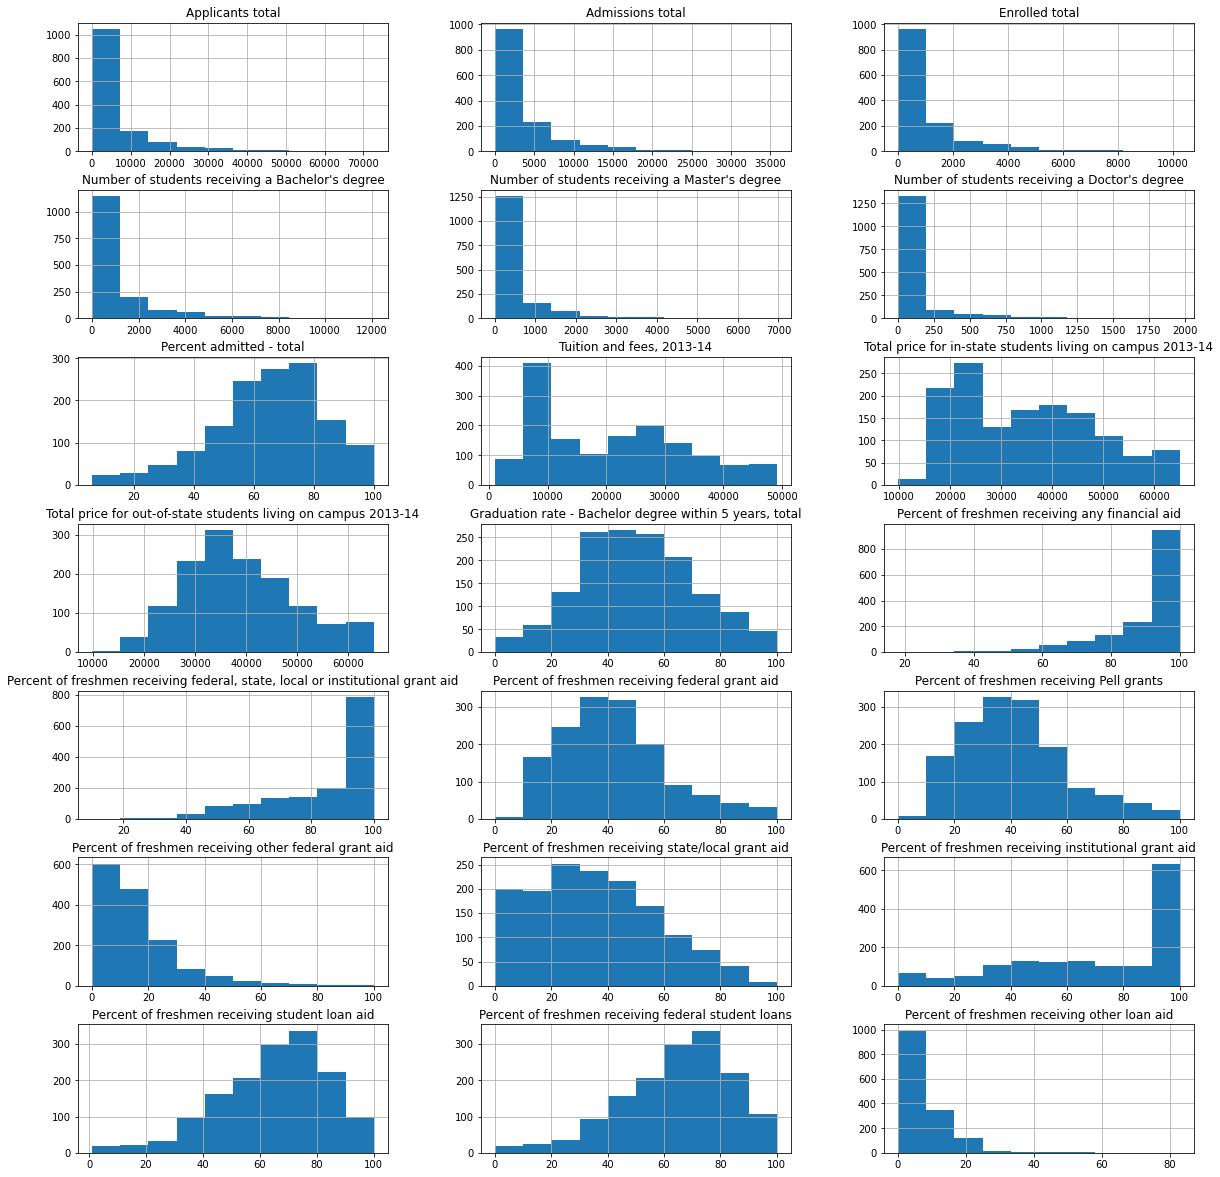

In [125]:
# Plot distribution of each column
fig = df4.hist(figsize=(20,30), layout = (10,3))

In [126]:
# Change zero values to NaN
df4 = df4.replace(0,np.NaN)

In [127]:
# Check for summary of the data
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(df4.describe())

Applicants total  Admissions total  Enrolled total  \
count       1376.000000       1376.000000     1376.000000   
mean        6395.837936       3557.463663     1043.804506   
std         8788.972944       4309.957540     1285.324785   
min            4.000000          4.000000        2.000000   
25%         1491.750000        951.500000      287.000000   
50%         3360.000000       2056.000000      538.000000   
75%         7020.500000       4207.500000     1246.500000   
max        72676.000000      35815.000000    10241.000000   

       Number of students receiving a Bachelor's degree  \
count                                       1522.000000   
mean                                        1062.483574   
std                                         1473.763813   
min                                            1.000000   
25%                                          247.000000   
50%                                          483.000000   
75%                                         1214.000000   
max                                        12080.000000   

       Number of students receiving a Master's degree  \
count                                     1224.000000   
mean                                       515.769608   
std                                        764.550695   
min                                          1.000000   
25%                                         83.000000   
50%                                        243.000000   
75%                                        612.750000   
max                                       6958.000000   

       Number of students receiving a Doctor's degree  \
count                                      597.000000   
mean                                       229.338358   
std                                        331.119201   
min                                          1.000000   
25%                                         21.000000   
50%                                         75.000000   
75%                                        310.000000   
max                                       1964.000000   

       Percent admitted - total  Tuition and fees, 2013-14  \
count               1376.000000                1497.000000   
mean                  64.569767               20727.490314   
std                   18.710062               12455.805360   
min                    6.000000                1032.000000   
25%                   54.000000                8542.000000   
50%                   67.000000               20060.000000   
75%                   78.000000               29992.000000   
max                  100.000000               49138.000000   

       Total price for in-state students living on campus 2013-14  \
count                                        1400.000000            
mean                                        34935.306429            
std                                         13283.049319            
min                                          9768.000000            
25%                                         22487.000000            
50%                                         34115.000000            
75%                                         44835.750000            
max                                         64988.000000            

       Total price for out-of-state students living on campus 2013-14  \
count                                        1400.000000                
mean                                        38767.612857                
std                                         10716.524007                
min                                          9768.000000                
25%                                         31128.000000                
50%                                         37193.500000                
75%                                         45907.500000                
max                                         64988.000000                

       Graduation rate - Bachelor degree within 5 years, t

We will change `Offers Less than one year certificate`, `Offers One but less than two years certificate`, `Offers Two but less than 4 years certificate`, `Offers Bachelor's degree`, `Offers Master's degree `, `Offers Doctor's degree - research/scholarship`, `Offers Doctor's degree - professional practice` columns to numeric value (1 & 0).

In [128]:
# Change to boolean
d = {'yes':1,'implied no':0}
df4 = df4.replace(d)
df4.head()

Name  \
0             alabama a & m university   
1  university of alabama at birmingham   
2                   amridge university   
3  university of alabama in huntsville   
4             alabama state university   

                              Highest degree offered  \
0             doctor's degree - research/scholarship   
1  doctor's degree - research/scholarship and pro...   
2  doctor's degree - research/scholarship and pro...   
3  doctor's degree - research/scholarship and pro...   
4  doctor's degree - research/scholarship and pro...   

   Offers Less than one year certificate  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    1.0   
4                                    0.0   

   Offers One but less than two years certificate  \
0                                             0.0   
1                                             1.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Offers Two but less than 4 years certificate  Offers Bachelor's degree  \
0                                           0.0                       1.0   
1                                           1.0                       1.0   
2                                           0.0                       1.0   
3                                           0.0                       1.0   
4                                           0.0                       1.0   

   Offers Master's degree  Offers Doctor's degree - research/scholarship  \
0                     1.0                                            1.0   
1                     1.0                                            1.0   
2                     1.0                                            1.0   
3                     1.0                                            1.0   
4                     1.0                                            1.0   

   Offers Doctor's degree - professional practice  Applicants total  ...  \
0                                             0.0            6142.0  ...   
1                                             1.0            5689.0  ...   
2                                             1.0               NaN  ...   
3                                             1.0            2054.0  ...   
4                                             1.0           10245.0  ...   

   Percent of freshmen receiving any financial aid  \
0                                             97.0   
1                                             90.0   
2                                            100.0   
3                                             87.0   
4                                             93.0   

   Percent of freshmen receiving federal, state, local or institutional grant aid  \
0                                               89.0                                
1                                               79.0                                
2                                               90.0                                
3                                               77.0                                
4                                               87.0                                

   Percent of freshmen receiving federal grant aid  \
0                                             81.0   
1                                             36.0   
2                                             90.0   
3                                             31.0   
4                                             76.0   

   Percent of freshmen receiving Pell grants  \
0                                       81.0   
1                                       36.0   
2                                       90.0   
3                                       31.0   
4                                       76.0   

   Percent of freshmen receiving 

## Analysis

First of all, we need to check for correlation between `Applicants total` and the other numeric fields. To see if there is potential factor with high correlation.

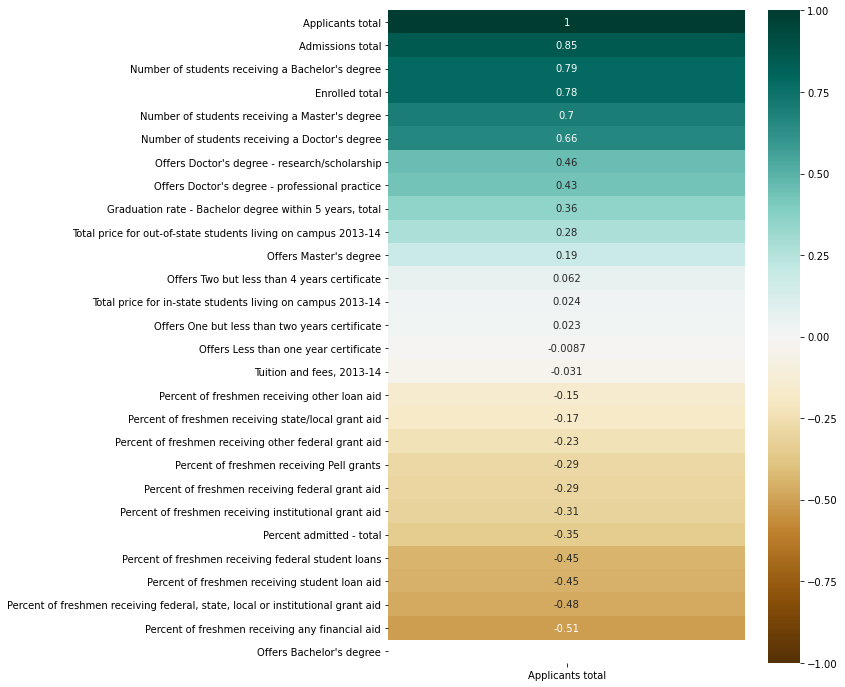

In [135]:
# Plot correlation of Applicants Total
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(df4.corr()[['Applicants total']].sort_values(by='Applicants total', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

There is no  very strong correlation (correlation coefficient >= 0.8) of `Applicants total` columns with potential factor for interest. We will try to create scatterplot from of the potential correlated variable.

In [140]:
# Create Scatter plot (coef correlating with Applicants total > 0.2 or < -0.2)
correlation_col = ["Number of students receiving a Master's degree","Number of students receiving a Doctor's degree",
                  "Offers Doctor's degree - research/scholarship","Offers Doctor's degree - professional practice",
                  "Graduation rate - Bachelor degree within 5 years, total","Total price for out-of-state students living on campus 2013-14",
                  "Percent of freshmen receiving federal grant aid","Percent of freshmen receiving Pell grants",
                  "Percent of freshmen receiving institutional grant aid","Percent admitted - total",
                  "Percent of freshmen receiving federal student loans","Percent of freshmen receiving other loan aid",
                  "Percent of freshmen receiving federal, state, local or institutional grant aid","Percent of freshmen receiving any financial aid"]

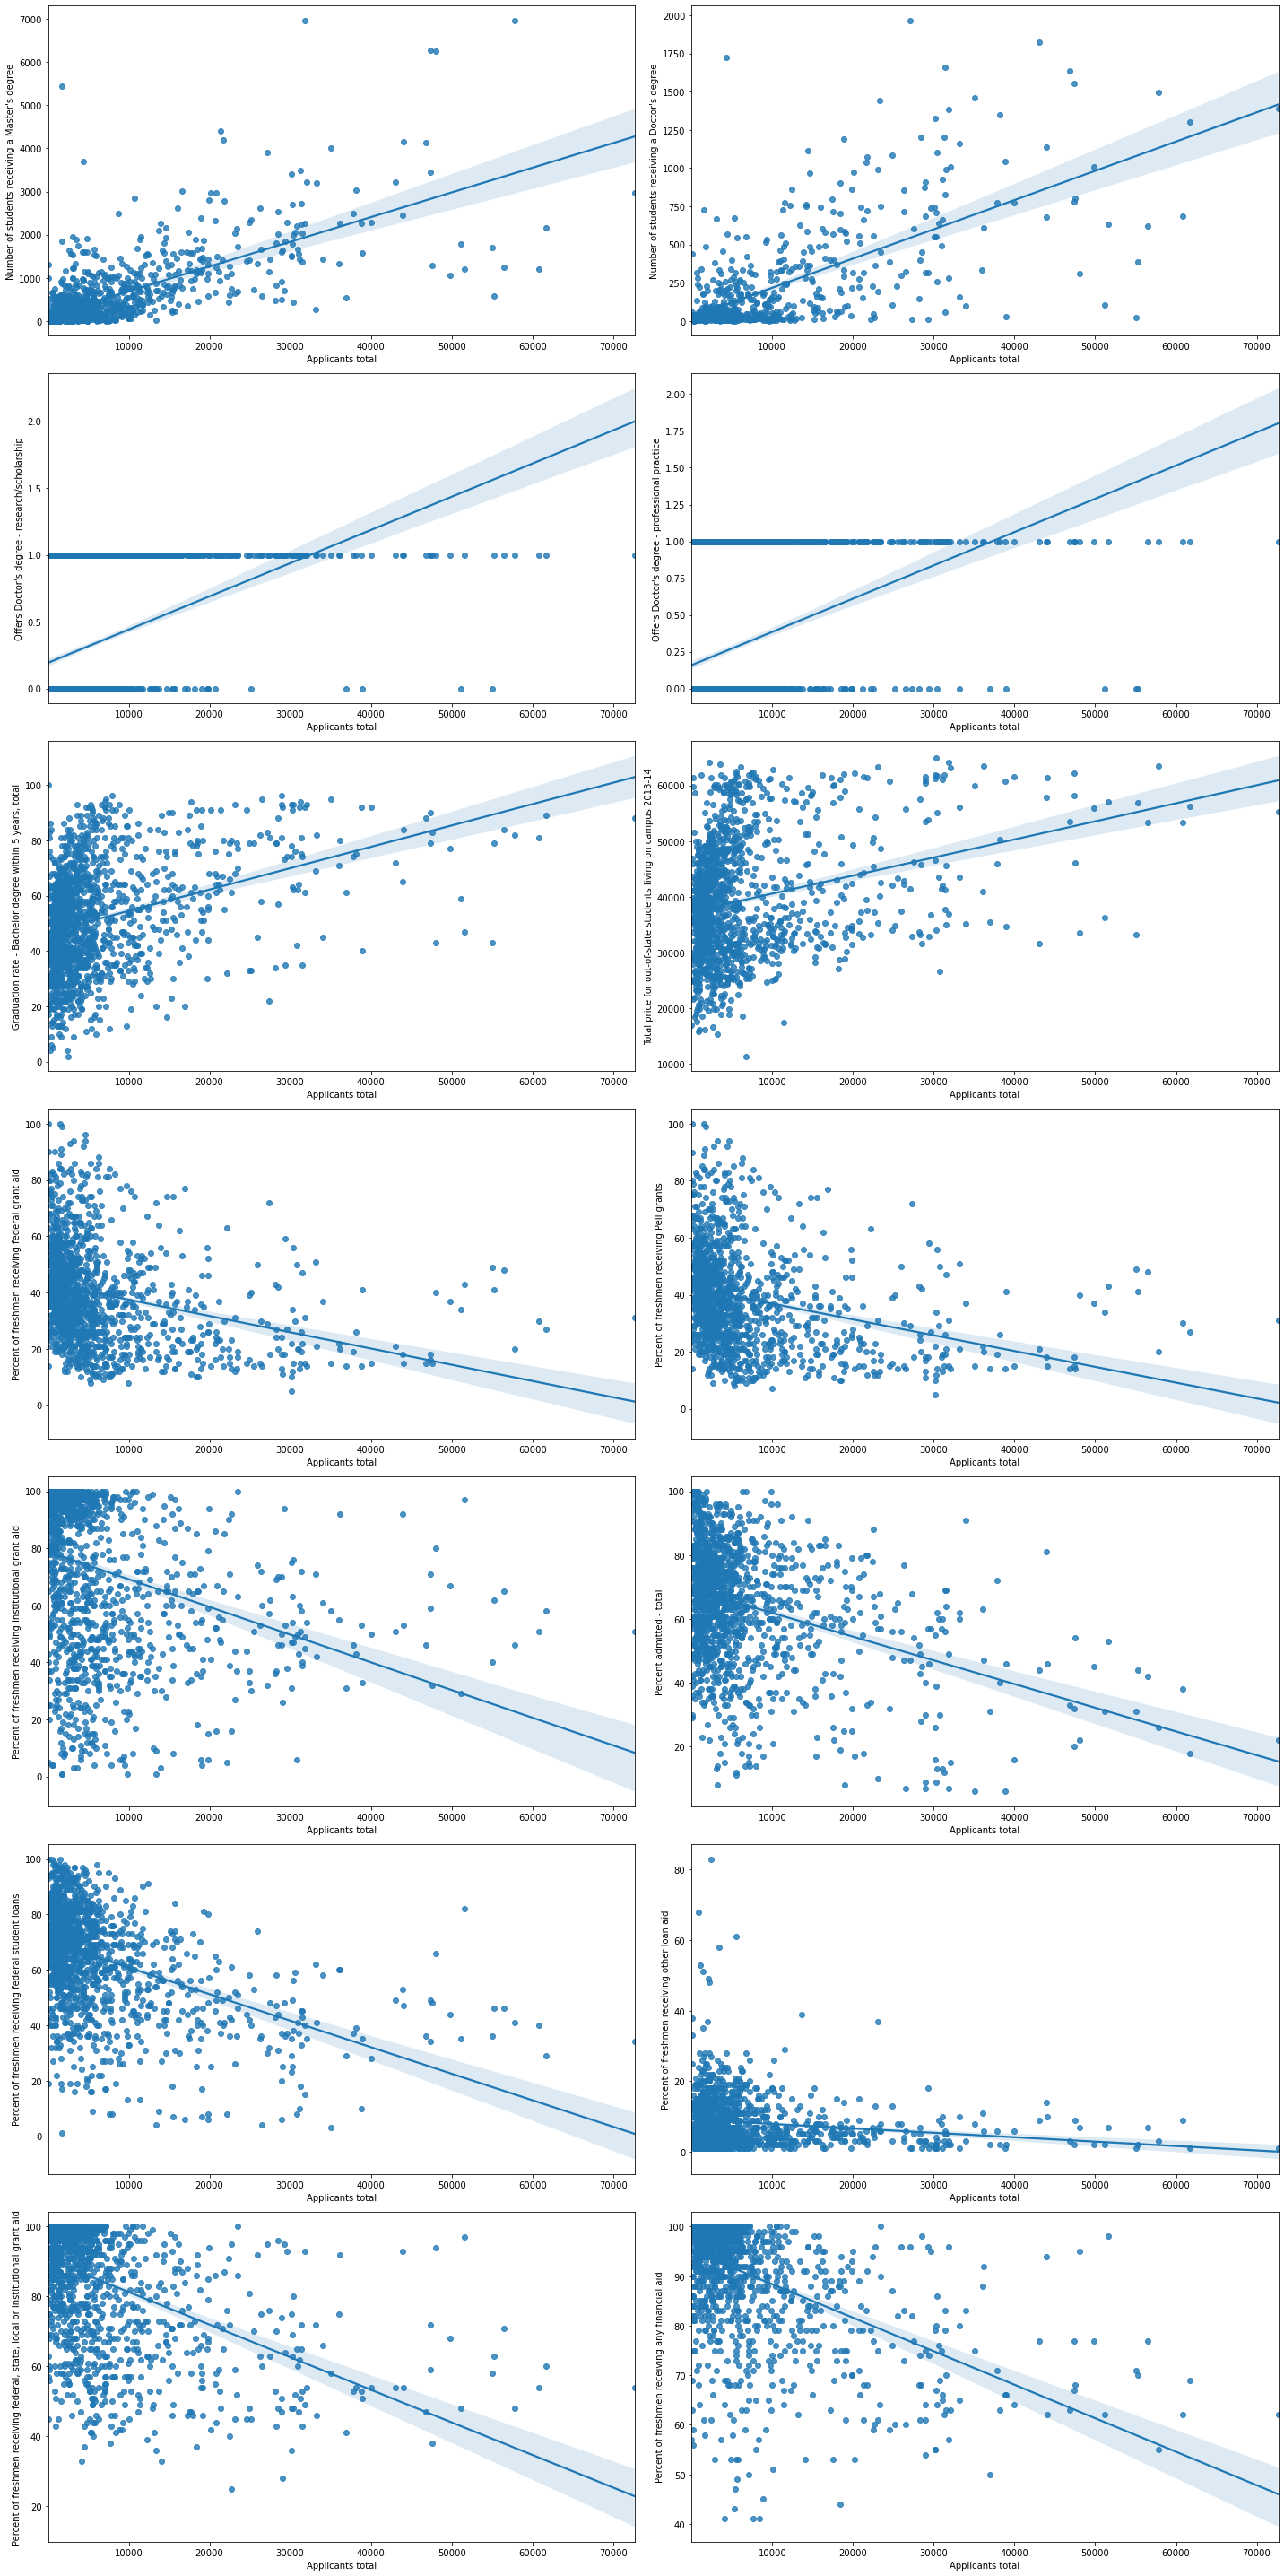

In [151]:
plt.figure(figsize=(20,40))

for i,c in enumerate(correlation_col):
    plt.subplot(7,2,i+1)
    sns.regplot(x="Applicants total", y=c, data=df4)
    
plt.tight_layout()
plt.show()

From the Scatter plot above, we can see:
1. The graduation number of post graduate program
2. Bachelor program graduation rate
3. Doctor's degree program
4. Total living cost for out -state students living on campus
have possitive correlation to number of applicants.
while:
1. Percentage of students get aid
heve negative correlation to number of applicants.

### Universities by Institution

American universities have 2 Institution, either **Public** or **Private** institution.
We will check the distribution of `Applicants total` within American Universities by institution.
Later we will check if there is factors can make either institution more prefered by students.

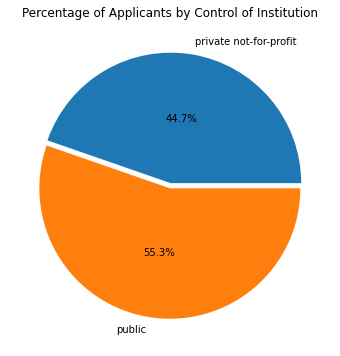

In [65]:
# Plot percentage of applicants by Control of Institution
applicants_by_institution = df4.groupby('Control of institution')['Applicants total'].sum()
applicants_by_institution

pie, ax = plt.subplots(figsize=[10,6])
labels = applicants_by_institution.keys()
plt.pie(x=applicants_by_institution, autopct='%.1f%%', explode=[0.02]*2,labels=labels,pctdistance=0.5)
plt.title('Percentage of Applicants by Control of Institution')
plt.show()

There is slight difference betwwen **Private** and **Public** universities. From the chart, students is prefer to choose **Public** universities rather than Private.

We will why students tend to choose **Public** universities.

In [66]:
# Check for average
institutional_avg = df4.groupby('Control of institution').mean()
institutional_avg

Applicants total  Admissions total  Enrolled total  \
Control of institution                                                       
private not-for-profit       4530.266129       2269.398618      539.124424   
public                       9583.468504       5758.330709     1906.131890   

                        Number of students receiving a Bachelor's degree  \
Control of institution                                                     
private not-for-profit                                        517.492723   
public                                                       1998.700000   

                        Number of students receiving a Master's degree  \
Control of institution                                                   
private not-for-profit                                      403.009550   
public                                                      684.105906   

                        Number of students receiving a Doctor's degree  \
Control of institution                                                   
private not-for-profit                                      191.385350   
public                                                      271.448763   

                        Percent admitted - total  Tuition and fees, 2013-14  \
Control of institution                                                        
private not-for-profit                 62.687788               28074.596603   
public                                 67.785433                8257.266667   

                        Total price for in-state students living on campus 2013-14  \
Control of institution                                                               
private not-for-profit                                       42508.369369            
public                                                       21800.775391            

                        Total price for out-of-state students living on campus 2013-14  \
Control of institution                                                                   
private not-for-profit                                       42508.369369                
public                                                       32279.738281                

                        ...  Percent of freshmen receiving any financial aid  \
Control of institution  ...                                                    
private not-for-profit  ...                                        93.340426   
public                  ...                                        86.128623   

                        Percent of freshmen receiving federal, state, local or institutional grant aid  \
Control of institution                                                                                   
private not-for-profit                                          91.067021                                
public                                                          73.221014                                

                        Percent of freshmen receiving federal grant aid  \
Control of institution                                                    
private not-for-profit                                        40.898829   
public                                                        42.521739   

                        Percent of freshmen receiving Pell grants  \
Control of institution                                              
private not-for-profit                                  40.094782   
public                                                  41.976449   

                        Percent of freshmen receiving other federal grant aid  \
Control of institution                                                          
private not-for-profit                                          19.055127       
public                                                          10.695327       

                        Percent of freshmen receiving state/local grant aid  \
Control of institution                                       

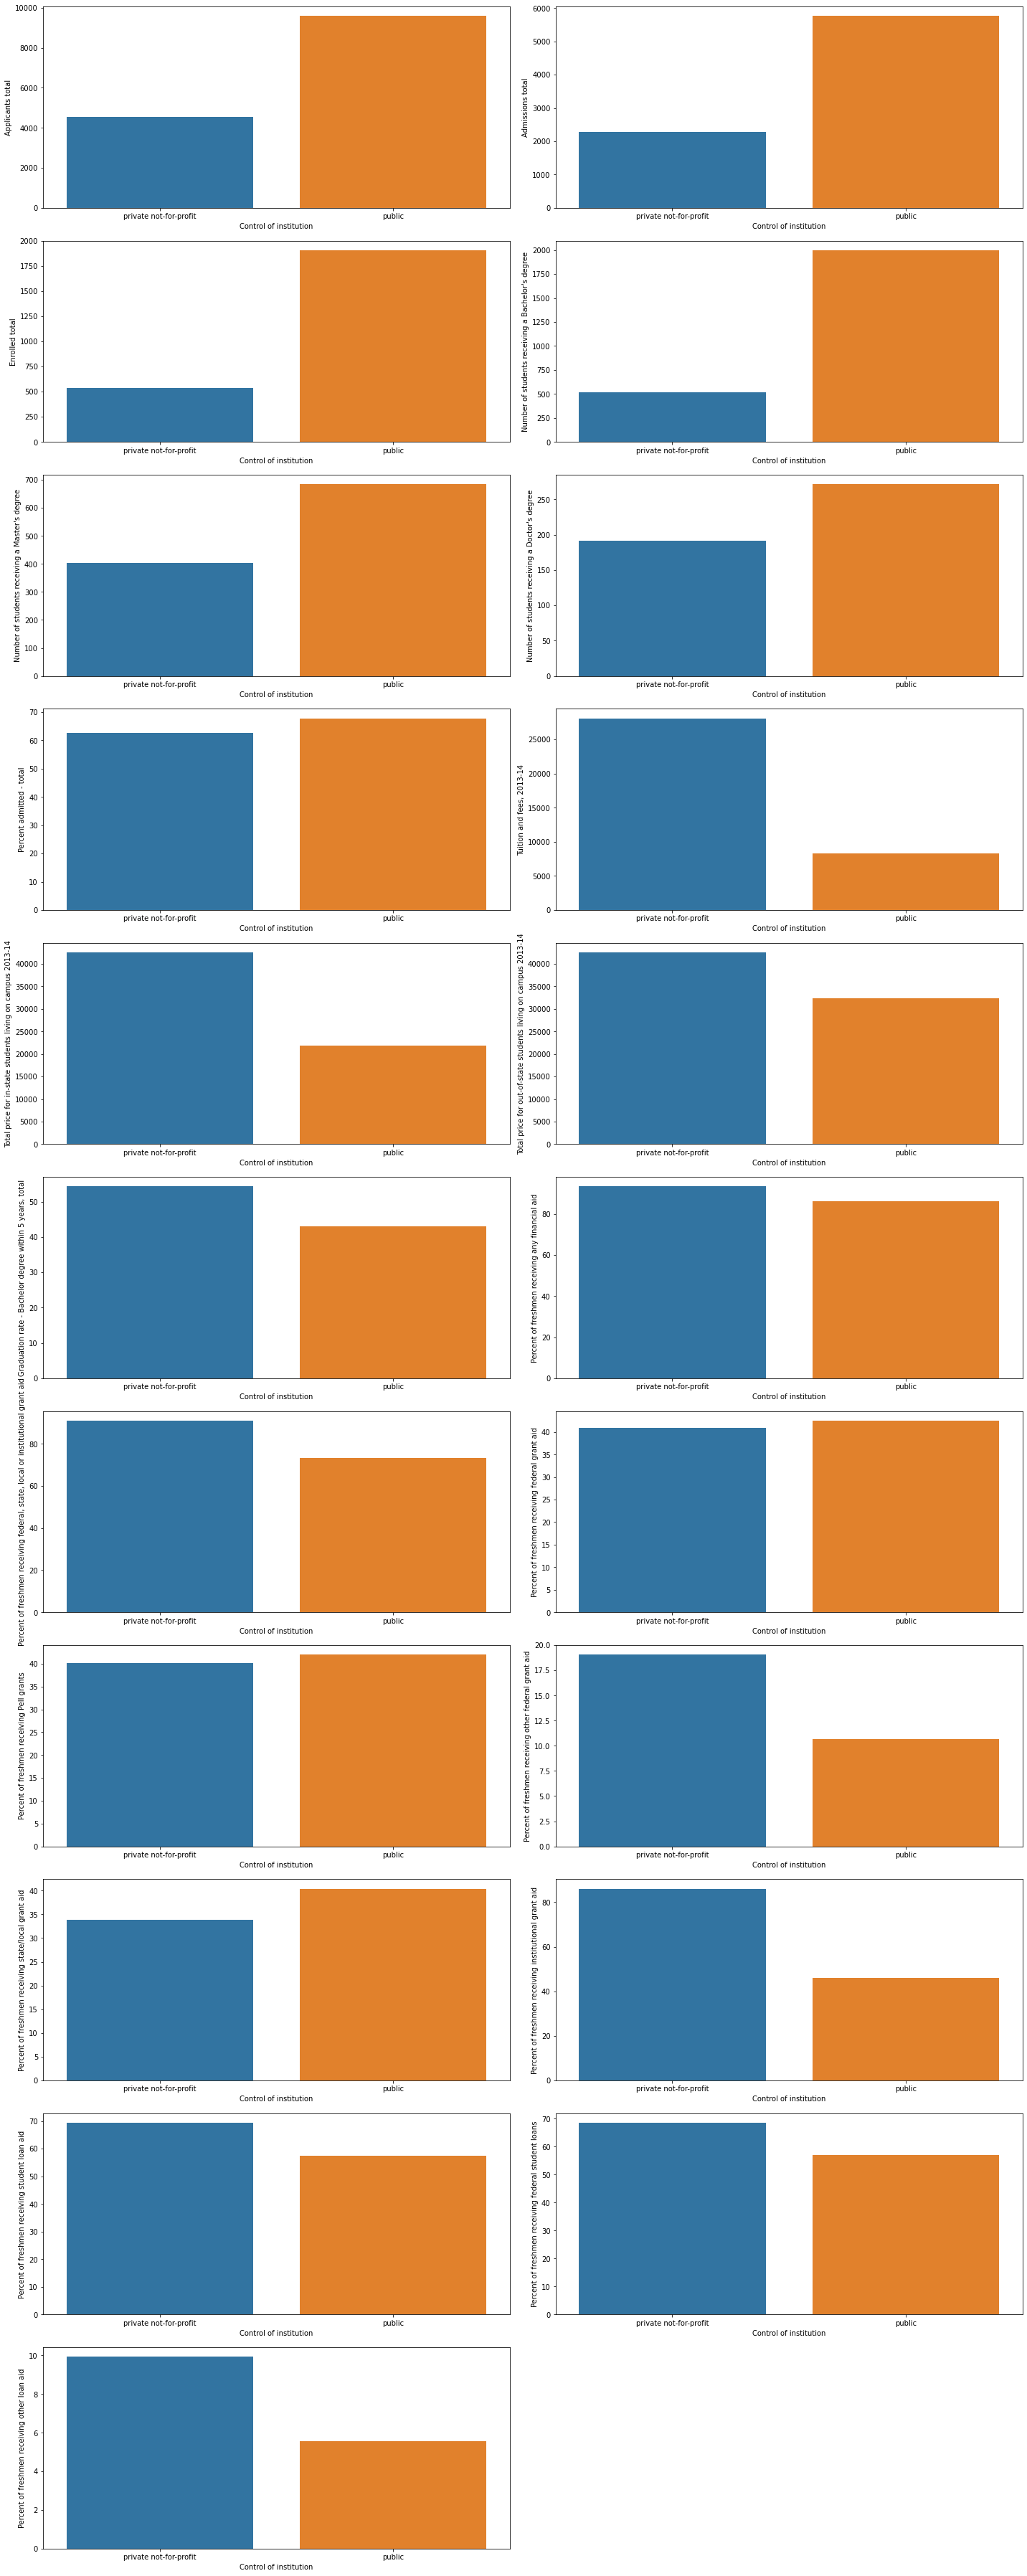

In [176]:
# Plot the comparison value
plt.figure(figsize=(20,50))

for i,c in enumerate(institutional_avg.columns):
    plt.subplot(11,2,i+1)
    sns.barplot(x = institutional_avg.index, y=c, data=institutional_avg)

plt.tight_layout()
plt.show()

From the`institutional_avg` table, we can see **Public** universities have advantage in average of:
1. **Number of students receiving a Bachelor's degree**
2. Number of students recaiing a Master's degree
3. Number of students receiving a Doctor's degree
4. Percent admitted (slight difference)
5. **Tuition and fees**
6. **Total price for in-state students living on campus**
7. **Total price for out-of-state students living on campus**
8. Percent of freshmen receiving federal grant aid
9. Percent of freshmen receiving Pell grants
10. Percent of freshmen receiving state/local grant aid

The **Bold** points have the most difference. 

We can conclude, the resons Students prefer to attend **Public** universities is the **Tuition and fees**, **Number of graduated Bachelor's degrees** and **The living on campus cost**.

### Universities by Degree of urbanization (Urban-centric locale)

Beside by Institution, we will check the population of `Applicants total` by `Degree of urbanization (Urban-centric locale)`.

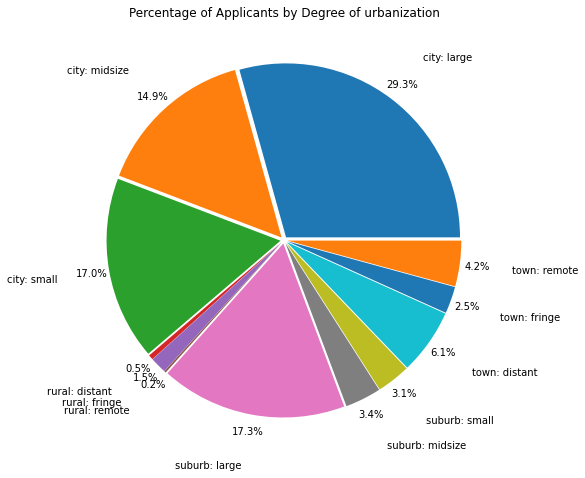

In [67]:
# Plot percentage of applicants by Degree of urbanization
applicants_by_urban = df4.groupby('Degree of urbanization (Urban-centric locale)')['Applicants total'].sum()
applicants_by_urban

pie, ax = plt.subplots(figsize=[10,8])
labels = applicants_by_urban.keys()
plt.pie(x=applicants_by_urban, autopct='%.1f%%', explode=[0.02]*12,labels=labels,pctdistance=1.1,labeldistance=1.3)
plt.title('Percentage of Applicants by Degree of urbanization')
plt.show()

From the chart, Majority of applicants choose Universites at cities rather than rual, suburb or town universities. High chance the **City universities** are more preferable because the access for living needs are more easier and the number of facilities is higher than rural, suburb or town universities.

### Top 20 Universities with Most Applicants

Now, we will check the Universities with most applicants which is the most favourite universities by Students. From this analysis, we will continue to analysis what make these universities have more applocants than he others.

In [68]:
# Search for top 20 Universities with highest number of applicants
top20_uni = df4.sort_values(by='Applicants total', ascending=False).head(20).reset_index(drop=True)
top20_uni

Name  \
0        university of california-los angeles   
1           university of california-berkeley   
2          university of california-san diego   
3                         new york university   
4             university of california-irvine   
5      university of california-santa barbara   
6      california state university-long beach   
7               st john's university-new york   
8                  san diego state university   
9              university of california-davis   
10                         liberty university   
11  pennsylvania state university-main campus   
12                    northeastern university   
13          university of southern california   
14           university of michigan-ann arbor   
15                          boston university   
16                          drexel university   
17        university of minnesota-twin cities   
18                         cornell university   
19      california state university-fullerton   

                               Highest degree offered  \
0   doctor's degree - research/scholarship and pro...   
1   doctor's degree - research/scholarship and pro...   
2   doctor's degree - research/scholarship and pro...   
3   doctor's degree - research/scholarship and pro...   
4   doctor's degree - research/scholarship and pro...   
5              doctor's degree - research/scholarship   
6                             doctor's degree - other   
7   doctor's degree - research/scholarship and pro...   
8                             doctor's degree - other   
9   doctor's degree - research/scholarship and pro...   
10  doctor's degree - research/scholarship and pro...   
11  doctor's degree - research/scholarship and pro...   
12  doctor's degree - research/scholarship and pro...   
13  doctor's degree - research/scholarship and pro...   
14  doctor's degree - research/scholarship and pro...   
15  doctor's degree - research/scholarship and pro...   
16  doctor's degree - research/scholarship and pro...   
17  doctor's degree - research/scholarship and pro...   
18  doctor's degree - research/scholarship and pro...   
19                            doctor's degree - other   

   Offers Less than one year certificate  \
0                             implied no   
1                             implied no   
2                             implied no   
3                                    yes   
4                             implied no   
5                             implied no   
6                             implied no   
7                             implied no   
8                             implied no   
9                             implied no   
10                                   yes   
11                                   yes   
12                            implied no   
13                            implied no   
14                            implied no   
15                            implied no   
16                                   yes   
17                                   yes   
18                            implied no   
19                            implied no   

   Offers One but less than two years certificate  \
0                                      implied no   
1                                      implied no   
2                                      implied no   
3                                      implied no   
4                                      implied no   
5                                      implied no   
6                                      implied no   
7                                             yes   
8                                      implied no   
9                                      implied no   
10                                            yes   
11                                            yes   
12                                     implied no   
13                                     implied no   
14                                     implied no   
15                                     i

Text(0, 0.5, 'University Name')

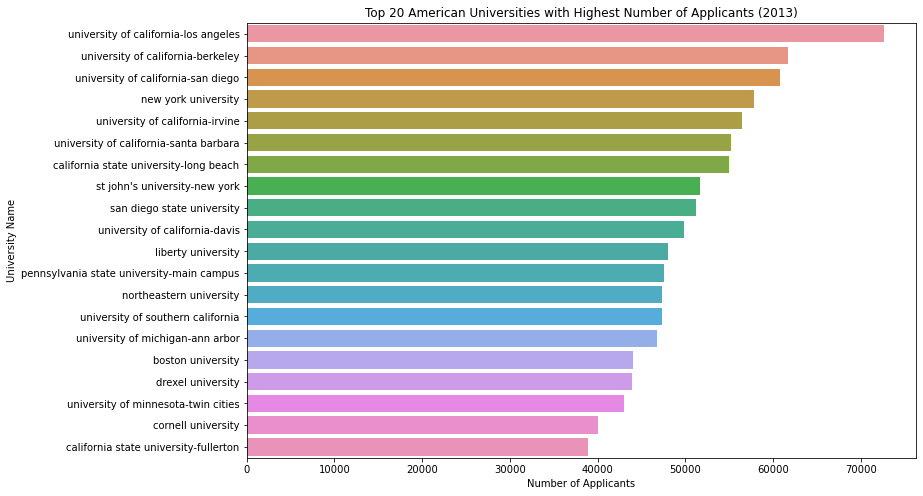

In [69]:
# Plot for Top 20 Universities with highest number of applicants
plt.figure(figsize=(12,8))
sns.barplot(x='Applicants total', y = 'Name', data = top20_uni)
plt.title('Top 20 American Universities with Highest Number of Applicants (2013)')
plt.xlabel('Number of Applicants')
plt.ylabel('University Name')

In [70]:
# Find out the highest degree offered by Universities
degree_offered = top20_uni[['Name','Highest degree offered']]
degree_offered

Name  \
0        university of california-los angeles   
1           university of california-berkeley   
2          university of california-san diego   
3                         new york university   
4             university of california-irvine   
5      university of california-santa barbara   
6      california state university-long beach   
7               st john's university-new york   
8                  san diego state university   
9              university of california-davis   
10                         liberty university   
11  pennsylvania state university-main campus   
12                    northeastern university   
13          university of southern california   
14           university of michigan-ann arbor   
15                          boston university   
16                          drexel university   
17        university of minnesota-twin cities   
18                         cornell university   
19      california state university-fullerton   

                               Highest degree offered  
0   doctor's degree - research/scholarship and pro...  
1   doctor's degree - research/scholarship and pro...  
2   doctor's degree - research/scholarship and pro...  
3   doctor's degree - research/scholarship and pro...  
4   doctor's degree - research/scholarship and pro...  
5              doctor's degree - research/scholarship  
6                             doctor's degree - other  
7   doctor's degree - research/scholarship and pro...  
8                             doctor's degree - other  
9   doctor's degree - research/scholarship and pro...  
10  doctor's degree - research/scholarship and pro...  
11  doctor's degree - research/scholarship and pro...  
12  doctor's degree - research/scholarship and pro...  
13  doctor's degree - research/scholarship and pro...  
14  doctor's degree - research/scholarship and pro...  
15  doctor's degree - research/scholarship and pro...  
16  doctor's degree - research/scholarship and pro...  
17  doctor's degree - research/scholarship and pro...  
18  doctor's degree - research/scholarship and pro...  
19                            doctor's degree - other

All of top universities offered doctor's degree as the highest level of education. It is clear universities with high level of degree offered tend to be favourite universities among the students.

Now we will compare the average for each field of all universities and top 20 universities.

In [71]:
# Check for average from all universities
all_avg = df4.mean()
all_avg

Applicants total                                                                   6395.837936
Admissions total                                                                   3557.463663
Enrolled total                                                                     1043.804506
Number of students receiving a Bachelor's degree                                   1062.483574
Number of students receiving a Master's degree                                      515.769608
Number of students receiving a Doctor's degree                                      229.338358
Percent admitted - total                                                             64.569767
Tuition and fees, 2013-14                                                         20727.490314
Total price for in-state students living on campus 2013-14                        34935.306429
Total price for out-of-state students living on campus 2013-14                    38767.612857
Graduation rate - Bachelor degree within 5 years, 

In [72]:
# Check for average for top 20 universities
top20_avg = top20_uni.mean()
top20_avg

Applicants total                                                                  50976.350000
Admissions total                                                                  18593.450000
Enrolled total                                                                     4517.950000
Number of students receiving a Bachelor's degree                                   5792.100000
Number of students receiving a Master's degree                                     2794.800000
Number of students receiving a Doctor's degree                                      858.200000
Percent admitted - total                                                             37.200000
Tuition and fees, 2013-14                                                         23055.300000
Total price for in-state students living on campus 2013-14                        40244.150000
Total price for out-of-state students living on campus 2013-14                    51085.250000
Graduation rate - Bachelor degree within 5 years, 

In [73]:
comparison = pd.concat([top20_avg, all_avg],axis = 1)
comparison.columns = ['top 20 average','all uni average']
comparison

top 20 average  \
Applicants total                                      50976.350000   
Admissions total                                      18593.450000   
Enrolled total                                         4517.950000   
Number of students receiving a Bachelor's degree       5792.100000   
Number of students receiving a Master's degree         2794.800000   
Number of students receiving a Doctor's degree          858.200000   
Percent admitted - total                                 37.200000   
Tuition and fees, 2013-14                             23055.300000   
Total price for in-state students living on cam...    40244.150000   
Total price for out-of-state students living on...    51085.250000   
Graduation rate - Bachelor degree within 5 year...       73.250000   
Percent of freshmen receiving any financial aid          71.800000   
Percent of freshmen receiving federal, state, l...       61.850000   
Percent of freshmen receiving federal grant aid          28.700000   
Percent of freshmen receiving Pell grants                28.550000   
Percent of freshmen receiving other federal gra...        9.647059   
Percent of freshmen receiving state/local grant...       26.000000   
Percent of freshmen receiving institutional gra...       56.650000   
Percent of freshmen receiving student loan aid           44.450000   
Percent of freshmen receiving federal student l...       43.900000   
Percent of freshmen receiving other loan aid              5.105263   

                                                    all uni average  
Applicants total                                        6395.837936  
Admissions total                                        3557.463663  
Enrolled total                                          1043.804506  
Number of students receiving a Bachelor's degree        1062.483574  
Number of students receiving a Master's degree           515.769608  
Number of students receiving a Doctor's degree           229.338358  
Percent admitted - total                                  64.569767  
Tuition and fees, 2013-14                              20727.490314  
Total price for in-state students living on cam...     34935.306429  
Total price for out-of-state students living on...     38767.612857  
Graduation rate - Bachelor degree within 5 year...        50.059946  
Percent of freshmen receiving any financial aid           90.672252  
Percent of freshmen receiving federal, state, l...        84.464477  
Percent of freshmen receiving federal grant aid           41.499665  
Percent of freshmen receiving Pell grants                 40.791415  
Percent of freshmen receiving other federal gra...        15.953537  
Percent of freshmen receiving state/local grant...        36.259615  
Percent of freshmen receiving institutional gra...        71.145763  
Percent of freshmen receiving student loan aid            64.959786  
Percent of freshmen receiving federal student l...        64.223340  
Percent of freshmen receiving other loan aid               8.317343

In [185]:
comparison = comparison.T

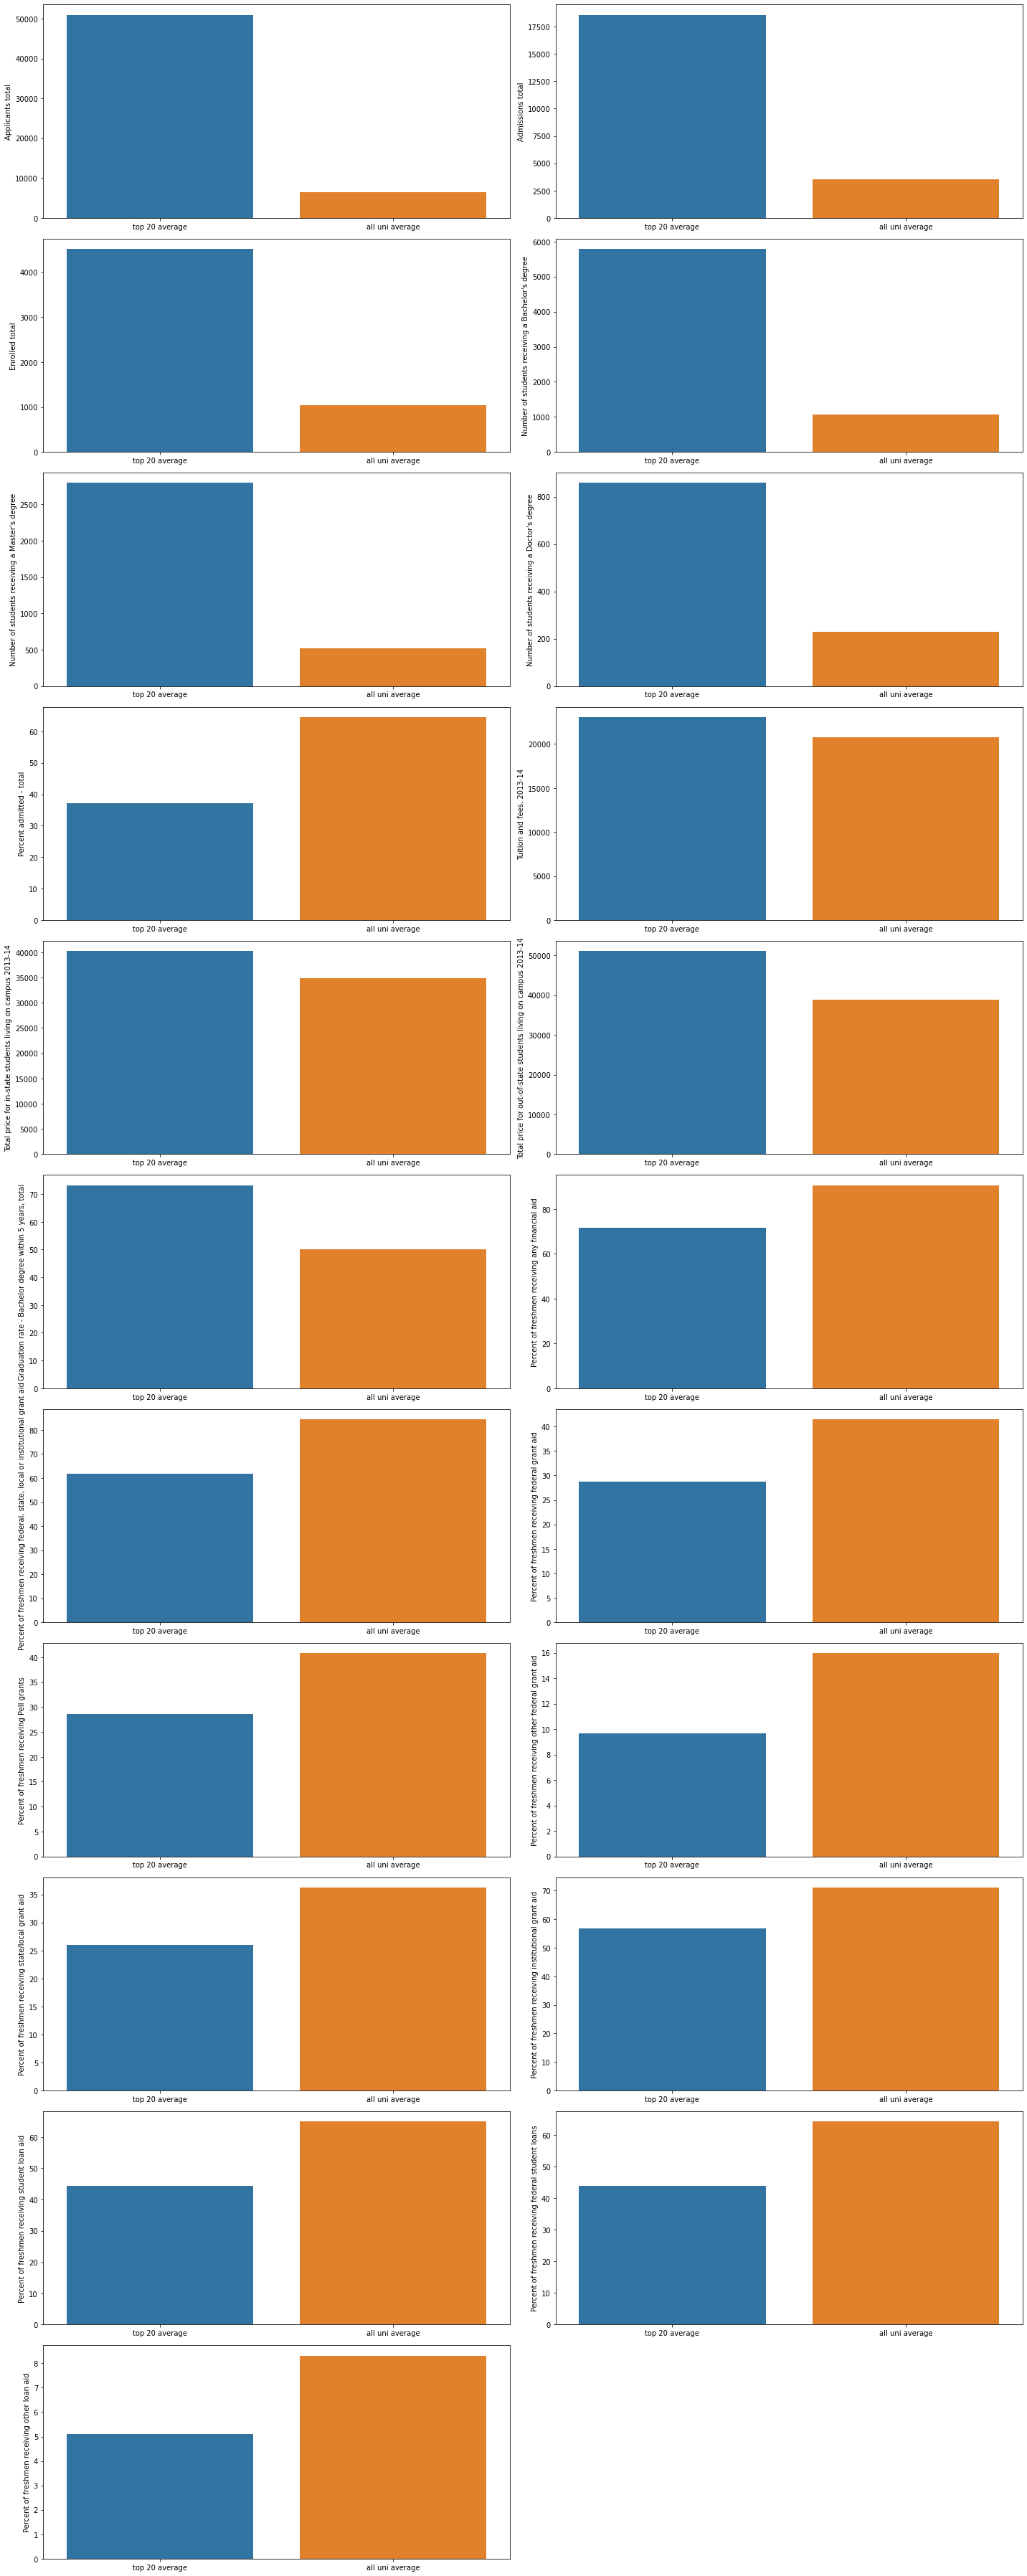

In [186]:
# Plot the comparison Table
plt.figure(figsize=(20,50))

for i,c in enumerate(comparison.columns):
    plt.subplot(11,2,i+1)
    sns.barplot(x = comparison.index, y=c, data=comparison)

plt.tight_layout()
plt.show()

From the comparison table, even with higher Tuition fees, living cost and the lower percentage of loan aid received by students, those universities still have highest number of applicants. 

On the other hand, we can see that top 20 universities have lower percent admitted than the average of all universities.

The number of enrolled, admissions and graduated students can not considered as relevant factor sincen all of them always directly proportional with applicants number.

From the comparison table, the high number of applicants is not affected by any others of variable. Still, the curriculum and the after graduation job can be play a big role for students to chosse the favourite universities. This need further analysis to get the definite conclussion.

## Conclussion

From the Analysis, we can take some point that play roles for students to choose the facourite universities:
1. The higher **Degree offered** take into account to choose the favourite university.
2. **Bachelor's Graduation Rate** have correlation too with students preference.
3. **Post Graduate program graduation** number have correlation too with students university.
4. **Public** Universities tend to be more favourited by students because the **Tuition and fees** and **The living on campus cost** which tends to be low.
5. Universities located at **City** is more popular than the universities located at town, suburb or rural area. High chance because of the **access for living needs** are more easier and the **number of facilities** is higher.
6. Universities with most of the applicants number is not determined by Tuition fees or the living cost. Even they have lower percentage of admitted applicants than the others. 
7. The curriculum and the after graduation job can be play a big role for students to chosse the favourite universities. The further analysis is required for definite conclussion.